## Create the probability model for coin flip

For convenience, we will use the `dit` (Discrete Information Theory) package to create discrete probability models, e.g., a random coin toss. The package needs to be installed.

In [0]:
!pip install dit

We need to import the package before using it. We will also import `numpy` for some basic continuous probability model, such as random real number in an interval.

In [0]:
import numpy as np
import dit

Define the distribution of a coin flip where the probability $p$ of head is draw uniformly randomly from the unit interval $[0,1)$. We use 'H' and 'T' to denote head and tail respectively.

In [0]:
p = np.random.random() # randomly generate the probability of head coming up.
coin_flip = dit.Distribution(['H','T'],[p,1-p]) # create the probability model 
coin_flip

Toss the coin one time and multiple times.

In [0]:
coin_flip.rand(), coin_flip.rand(10)

('T', ['H', 'T', 'T', 'H', 'H', 'H', 'T', 'H', 'T', 'T'])

## Estimate the probability $p$ of head

We can estimate $p$ by the empirical probability
$$\hat{p} := \frac1n \sum_{i=0}^{n-1} z_i$$
of head, where $z_1,\dots,z_n$ are i.i.d. samples of
$$Z := \begin{cases}
1 & \text{if head comes up}\\
0 & \text{if tail comes up.}
\end{cases}$$
In other words, $\hat{p}$ is the fraction of heads coming up in $n$ coin tosses.

### Bias

$\hat{p}$ is an unbiased estimate because
$$\begin{aligned}
E[\hat{p}] &= E\left[\frac1n \sum_{i=0}^{n-1} z_i \right]\\
&= \frac1n \sum_{i=0}^{n-1} \underbrace{E[z_i]}_{\smash{=p}} && \text{by ...}\\
&= p.
\end{aligned}
$$

### Consistency



To show that $\hat{p}$ is a consistent estimate, note that $\hat{p}$ is a random variable with standard deviation given by
$$\begin{aligned}\sigma &:=\sqrt{\operatorname{Var}[\hat{p}]}\\
&= \sqrt{\operatorname{Var}\left[\frac1{n} \sum_{i=1}^n z_i\right]}\\
&= \sqrt{\frac1{n^2} \operatorname{Var}\left[\sum_{i=1}^n z_i\right]}\\
&=\sqrt{\frac1{n^2} \sum_{i=1}^n \underbrace{\operatorname{Var}[z_i]}_{\smash{=p(1-p)}}} && \text{by ...}\\
&=\sqrt{\frac{p(1-p)}{n}} \end{aligned}.$$
Hence, the standard deviation goes to $0$ as $n$ goes to $\infty$.

### Illustration

We can illustrate the above qualities of the estimator by plotting the estimate $\hat{p}$ for different sample size $n$ starting from $1$ to $N$.


In [0]:
N=5000

Load the packages for plotting the figure.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
# set figure size
plt.rcParams["figure.figsize"] = (8,4)
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

#### Plot the ground truth

Create a plot with ground truth $p\pm 2 \sigma$ for reference. (By the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) as $n$ goes to $\infty$, the estimate has a gaussian distribution and so it falls within $2$ standard deviation away from $p$ with [probability over $95\%$](https://en.wikipedia.org/wiki/Standard_deviation).)

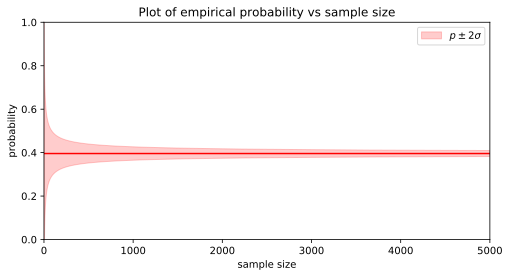

In [0]:
n_list = np.arange(1,N+1) 
# error boundaries defined by 2 standard deviations away from mean 
sigma2_list = np.sqrt(p*(1-p)/n_list) * 2 # numpy list support elementwise operations
ub = p+sigma2_list # upper boundary
lb = p-sigma2_list # lower boundary

f, ax = plt.subplots()
ax.axhline(p,color='red')
ax.fill_between(n_list, lb, ub, color='red',alpha=0.2,label=r'$p\pm 2\sigma$')
ax.set_ylim([0,1])
ax.set_xlim([0,len(n_list)])
ax.set_title('Plot of empirical probability vs sample size')
ax.set_xlabel('sample size')
ax.set_ylabel('probability')
ax.legend()

#### Plot the estimates

Generate a sequence of `N` samples.

In [0]:
outcome_list = coin_flip.rand(N)

Generate a list of $\hat{p}$ with increasing $n$ by calculating the fraction of head in the first $n$ samples. 

In [0]:
phat_list = np.array(
    [(0,1)[outcome == 'H'] for outcome in outcome_list],  # see tenary operator 
                  # https://book.pythontips.com/en/latest/ternary_operators.html
    dtype=float).cumsum()/n_list # numpy number list supports cumulative sum

In [0]:
outcome_list[:5], phat_list[:5] # for sanity check

(['H', 'H', 'T', 'T', 'H'],
 array([1.        , 1.        , 0.66666667, 0.5       , 0.6       ]))

In [0]:
ax.plot(n_list,phat_list,marker='.',color='blue',linestyle='',markersize=1) 
f

Repeatly run the codes of these section to see the variations of the estimates.